In [15]:
from torch.utils.data import DataLoader
import torch.fft as fft
from torchvision import datasets
from torchvision import transforms
import torch.nn.functional as F
from Code.Trainer.train import *
from Models.struc.deblur import getBlurFunc as bf_mnist
from Models.struc.deblur import getDeblurModel as dm_mnist
from Models.struc.deblur_cif import getBlurFunc
from Models.struc.deblur_cif import getCIFDeblurModel
from Models.struc.cif_classifier import getClassModel
from pathlib import Path
import matplotlib.pyplot as plt

In [3]:
train = datasets.MNIST(root='../../Images', 
                    train=True, 
                    download=True, 
                    transform=transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST(root='../../Images', 
                    train=False, 
                    download=True, 
                    transform=transforms.Compose([transforms.ToTensor()]))

train_dataset = DataLoader(dataset=train,
                        batch_size=128,
                        shuffle=True,
                        num_workers=4)

test_dataset = DataLoader(dataset=test,
                        batch_size=128,
                        shuffle=True,
                        num_workers=4)

evaluation_dataset = DataLoader(dataset=test,
                                batch_size=1,
                                shuffle=True,
                                num_workers=4)

In [4]:
save = []
for i, data in enumerate(evaluation_dataset):
    save.append(data) 
    if i > 4:
        break

torch.Size([1, 2, 28, 15])
torch.Size([1, 1, 28, 28])


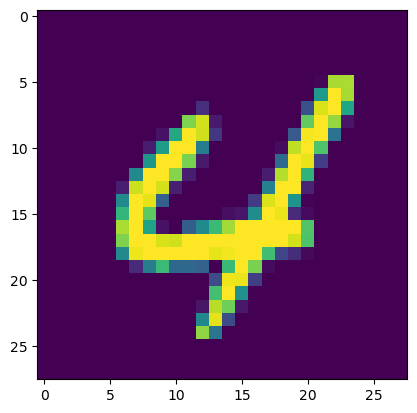

In [35]:
x = save[1]
x_fft = fft.rfft2(x[0], norm='backward')
x_imag = x_fft.imag
x_real = x_fft.real
x_cat = torch.cat([x_real, x_imag], 1)
print(x_cat.size())
x_if = fft.irfft2(x_fft)
print(x_if.size())
plt.imshow(x_if.detach().cpu().squeeze())
#plt.imshow(x[0].detach().cpu().squeeze())


In [11]:
data, label = save[0]
blur = bf_mnist()
model = dm_mnist()
model.load_state_dict(torch.load('/Users/liamduckworth/Documents/Coding/Research_Group/Deblur/Models/saves/deblur.pth', torch.device('mps')))
data = data.to(torch.device('mps'))
model = model.to(torch.device('mps'))
blur = blur.to(torch.device('mps'))
blur_out = blur(data)
deblur_out = model(blur_out)
p = Path()
p = p.resolve()
p = str(p)
to_pil = transforms.ToPILImage()
to_pil(data.detach().cpu().squeeze()).save(p + "/Outputs/Images/MNIST/Original.jpg")
to_pil(blur_out.detach().cpu().squeeze()).save(p + "/Outputs/Images/MNIST/Blurred.jpg")
to_pil(deblur_out.detach().cpu().squeeze()).save(p + "/Outputs/Images/MNIST/Deblurred.jpg")

In [2]:
cif_dataset_train = datasets.CIFAR10('./Images', 
                             train=False,
                             download=True,
                             transform=transforms.Compose([transforms.ToTensor()]))
cif_train = DataLoader(cif_dataset_train,
                       batch_size=64,
                       shuffle=True,
                       worker_init_fn=4)
cif_test = DataLoader(cif_dataset_train,
                       batch_size=1,
                       shuffle=True,
                       worker_init_fn=1)

Files already downloaded and verified


In [28]:
blur_func = getBlurFunc()
model = getCIFDeblurModel()
device = torch.device('mps')
opt = torch.optim.SGD(model.parameters(), 0.001)
for i in range(10):
    output = train_deblur(model, device, cif_train, opt, blur_func)
    print(output)

 |███████████████████████████████████████████████████████████████████████████████████████████████████-| 99.5% 
14.235970925539732
 |███████████████████████████████████████████████████████████████████████████████████████████████████-| 99.5% 
6.592856867238879
 |███████████████████████████████████████████████████████████████████████████████████████████████████-| 99.5% 
4.958548007532954
 |███████████████████████████████████████████████████████████████████████████████████████████████████-| 99.5% 
4.263410063460469
 |███████████████████████████████████████████████████████████████████████████████████████████████████-| 99.5% 
3.862820355221629
 |███████████████████████████████████████████████████████████████████████████████████████████████████-| 99.5% 
3.595368755981326
 |███████████████████████████████████████████████████████████████████████████████████████████████████-| 99.5% 
3.395926972851157
 |██████████████████████████████████████████████████████████████████████████████████████████████

In [3]:
blur_func = getBlurFunc()
model = getCIFDeblurModel()
device = torch.device('mps')
model.load_state_dict(torch.load('/Users/liamduckworth/Documents/Coding/Research_Group/Deblur/Models/saves/cif_deblur.pth', device))
model.eval()
model = model.to(device)
class_model = getClassModel()
class_model.load_state_dict(torch.load('./Models/saves/cif_classifier.pth',map_location=device))
class_model.eval()
class_model.to(device)

correct = cif_classifier_acr(class_model, model, device,cif_test, blur_func)



In [4]:
print(correct)

86.45


In [1]:
x = 4
y = 7

for i in range(3):
    if x > y:
        print("x is greater then y")
        break
    else:
        print("x is still less then y")
        x -= 1

x is still less then y
x is still less then y
x is still less then y
